# Step 1: Combine datasets into one final dataset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#import time series and co2 data
with open ("data/co2_mm_gl_space.txt") as file1:
    time=[]
    co2=[]
    for line in file1:
        #y=line[0:4]
        #m=line[8:10]
        #ym=m+'/'+y
        time.append(line[13:22])
        #time.append(ym)
        avg=line[25:32]
        co2.append(avg)
        timeco2=[time,co2]
            
            

In [3]:
#import temperature data
with open ("data/Temperature.txt") as file2:
    temp=[]
    for i, line in enumerate(file2):
        if i>=347:
            temp.append(line[12:21])
        if i>=891:
            break

In [4]:
#import sea ice area data
with open ("data/sea_extent.txt") as file3:
    ice=[]
    for i, line in enumerate(file3):
        if i>=2:
            ice.append(line[9:-1])
        if i>=546:
            break

In [5]:
#import sea ice extent data
with open ("data/sea_ice_extent.txt") as file5:
    ice_ex=[]
    for i, line in enumerate(file5):
            ice_ex.append(line[:6])

In [6]:
#import ocean ph data
with open ("data/phdata.txt") as file4:
    ph=[]
    timeph=[]
    for i, line in enumerate(file4):
        ph.append(line[:6])

In [7]:
#remove empty entries in ph data
for i in range(len(ph)):
    if ph[i] == 'NaN\t19':
       ph[i] = ''
    if ph[i] == 'NaN\t20':
       ph[i] = ''

ph1=[]
#replace empty entries with np.nan
for string in (ph):
    if string == '':
        string = np.nan
    ph1.append(string)

In [8]:
len(ph1)

545

In [9]:
#remove spaces in entries from co2 and time series
co2 = [x.strip(' ') for x in co2]
times=[]
for i in time:
    j = i.replace(' ','')
    times.append(j)

#remove empty characters from elements in ice_exs list
ice_exs=[]
for i in ice_ex:
    j = i.replace('\t','')
    ice_exs.append(j)

#remove header row
co2.pop(0)
times.pop(0)

'decim'

In [10]:
#replace strings with floats in each list
times2 = [float(string) for string in times]
co2_2=[float(string) for string in co2]
temp_2 = [float(string) for string in temp]
ice_2 = [float(string) for string in ice]
ph_2 = [float(string) for string in ph1]
ice_exs_2 = [float(string) for string in ice_exs]

In [11]:
#get annual average of each dataset
n = 12.0
year=times2[::12]
tempyear = [sum(temp_2[i:i+12])/n for i in range(0,len(temp_2),12)]
co2year = [sum(co2_2[i:i+12])/n for i in range(0,len(co2_2),12)]
iceyear = [sum(ice_2[i:i+12])/n for i in range(0,len(ice_2),12)]
iceexyear = [sum(ice_exs_2[i:i+12])/n for i in range(0,len(ice_exs_2),12)]

#get annual lists
#remove the last element because 2024 isn't finished yet so data is incomplete
year = year[:-1]
tempyear = tempyear[:-1]
co2year = co2year[:-1]
iceyear = iceyear[:-1]
iceexyear = iceexyear[:-1]
#sum(temp_2[:12])/12

In [12]:
#monthly dataset
dict = {'Time': times2, 'CO2': co2_2, 'Temp': temp_2, 'IceArea': ice_2, 'IceExtent': ice_exs_2, 'pH': ph_2}

df = pd.DataFrame(dict)
df.to_csv('org_data' + '/' + 'ClimateData.txt', sep='\t',index=False,header=False)

In [13]:
#yearly dataset
dict = {'Year': year, 'CO2': co2year, 'Temp': tempyear, 'IceArea': iceyear, 'IceExtent': iceexyear}

df2 = pd.DataFrame(dict)
df2.to_csv('org_data' + '/' + 'ClimateDataAnnual.txt', sep='\t',index=False,header=False)

In [14]:
#ph only dataset (do this because this dataset has a lot of missing values)
dfph1={'Time': times2, 'ph': ph_2} #make dictionary of time and ph
dfph = pd.DataFrame(dfph1) #make dataframe
dfph.dropna(inplace=True) #remove rows with NaN values
#write the ph and times to lists with no NaN values
phs = dfph['ph'].tolist() 
timeph = dfph['Time'].tolist()
dfph.to_csv('org_data' + '/' + 'pHData.txt', sep='\t', index=False, header=False)
#plotting this list will allow matplotlib to interpolate between the missing values

In [15]:
len(phs)

323

# Step 2: Initial Plots

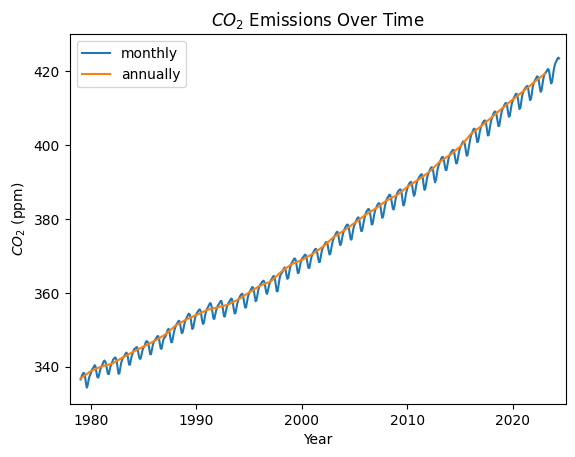

In [16]:
#plot the co2 emissions against time
plt.plot(times2,co2_2, label="monthly")
plt.plot(year,co2year, label="annually")
plt.xlabel('Year')
plt.ylabel('$CO_{2}$ (ppm)')
#plt.setp(plot.axes.get_xticklabels()[::10], visible=True)
plt.xlim(1978,2025)
plt.ylim(330,430)
plt.title("$CO_{2}$ Emissions Over Time")
plt.legend()
plt.savefig('images/co2.pdf', dpi=300, bbox_inches='tight')

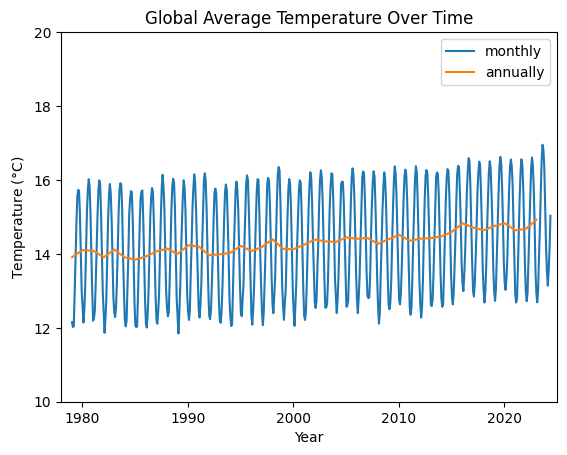

In [17]:
#plot the temperature against time
plt.plot(times2,temp_2, label="monthly")
plt.plot(year,tempyear, label="annually")
plt.xlabel('Year')
plt.ylabel('Temperature ($\degree$C)')
plt.xlim(1978,2025)
plt.ylim(10,20)
plt.title("Global Average Temperature Over Time")
plt.legend()
plt.savefig('images/temp.pdf', dpi=300, bbox_inches='tight')

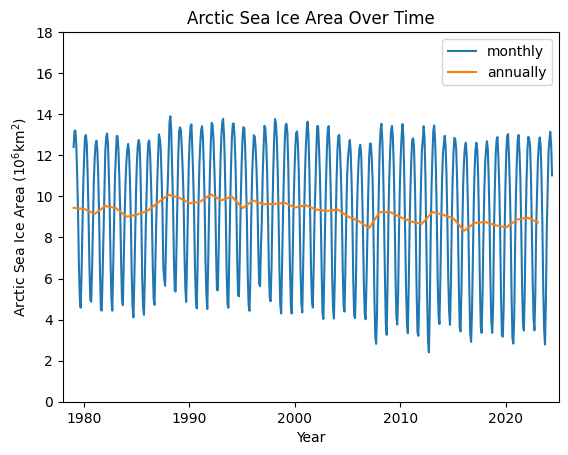

In [18]:
#plot the sea ice area against time
plt.plot(times2,ice_2,label="monthly")
plt.plot(year,iceyear,label="annually")
plt.xlabel('Year')
plt.ylabel('Arctic Sea Ice Area ($10^6$km$^2$)')
#plt.setp(plot.axes.get_xticklabels()[::10], visible=True)
plt.xlim(1978,2025)
plt.ylim(0,18)
plt.title("Arctic Sea Ice Area Over Time")
plt.legend()
plt.savefig('images/sea_ice.pdf', dpi=300, bbox_inches='tight')

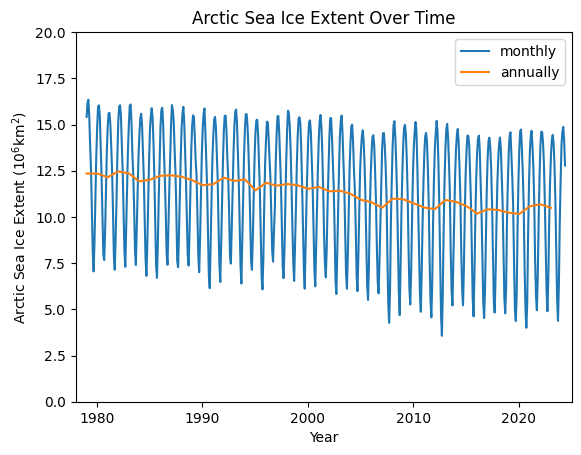

In [19]:
#plot the sea ice extent against time
plt.plot(times2,ice_exs_2,label="monthly")
plt.plot(year,iceexyear,label="annually")
plt.xlabel('Year')
plt.ylabel('Arctic Sea Ice Extent ($10^6$km$^2$)')
#plt.setp(plot.axes.get_xticklabels()[::10], visible=True)
plt.xlim(1978,2025)
plt.ylim(0,20)
plt.title("Arctic Sea Ice Extent Over Time")
plt.legend()
plt.savefig('images/sea_ice_ext.pdf', dpi=300, bbox_inches='tight')

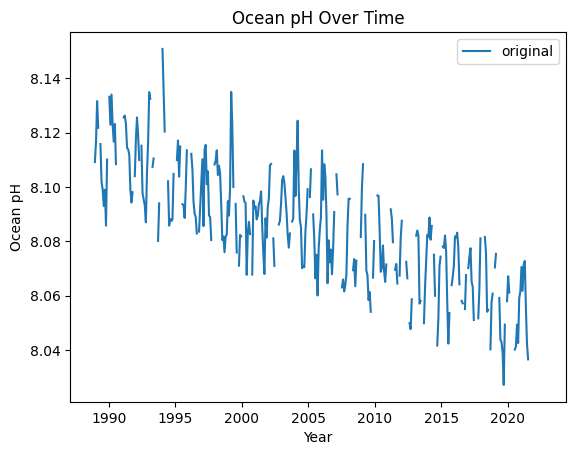

In [20]:
#plot the ocean pH against time
#plt.plot(timeph,phs,label="interpolated")
plt.plot(times2,ph_2,label="original")
plt.xlabel('Year')
plt.ylabel('Ocean pH')
#plt.setp(plot.axes.get_xticklabels()[::10], visible=True)
#plt.xlim(1978,2025)
#plt.ylim(0,18)
plt.title("Ocean pH Over Time")
plt.legend()
plt.savefig('images/ph.pdf', dpi=300, bbox_inches='tight')